Please find my comments below - **I kindly ask that you do not move, modify, or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>


<div class="alert alert-block alert-success">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Hello George,
    
Another project successfully completed - well done! 🏆 Your consistent effort and progress are truly commendable.
    
Our team is here to help you keep pushing forward and honing your skills as you advance through the program.
    
What Was Great:
- Good project structure
- High code level
- Great data preprocessing

Tips for Future Projects:
- It's a good practice to present comparison in dataframe (all in one table)
    
Congratulations again on your accomplishment! Each project you complete adds to your growing expertise, and it’s exciting to see you make such great strides. Keep up the great work! 🎯
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

## Data preparation

In [1]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
car_data = pd.read_csv('/datasets/car_data.csv')

In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
car_data.describe

<bound method NDFrame.describe of              DateCrawled  Price  VehicleType  RegistrationYear Gearbox  Power  \
0       24/03/2016 11:52    480          NaN              1993  manual      0   
1       24/03/2016 10:58  18300        coupe              2011  manual    190   
2       14/03/2016 12:52   9800          suv              2004    auto    163   
3       17/03/2016 16:54   1500        small              2001  manual     75   
4       31/03/2016 17:25   3600        small              2008  manual     69   
...                  ...    ...          ...               ...     ...    ...   
354364  21/03/2016 09:50      0          NaN              2005  manual      0   
354365  14/03/2016 17:48   2200          NaN              2005     NaN      0   
354366  05/03/2016 19:56   1199  convertible              2000    auto    101   
354367  19/03/2016 18:57   9200          bus              1996  manual    102   
354368  20/03/2016 19:41   3400        wagon              2002  manual    1

In [5]:
display(car_data)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [6]:
# Converting date columns to datetime format
date_columns = ['DateCrawled', 'DateCreated', 'LastSeen']
for col in date_columns:
    car_data[col] = pd.to_datetime(car_data[col], errors='coerce')

# Handling missing values 
categorical_columns = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'NotRepaired']
for col in categorical_columns:
    car_data[col].fillna('unknown', inplace=True)

# Filtering out unreasonable values for RegistrationYear, Power, and Price
current_year = pd.Timestamp.now().year
car_data = car_data[
    (car_data['RegistrationYear'] >= 1900) & (car_data['RegistrationYear'] <= current_year)
]
car_data = car_data[(car_data['Power'] > 0) & (car_data['Power'] < 1000)]
car_data = car_data[(car_data['Price'] > 100) & (car_data['Price'] < 100000)]

# Dropping irrelevant columns
car_data.drop(columns=['NumberOfPictures', 'PostalCode'], inplace=True)


car_data.info(), car_data.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 305061 entries, 1 to 354368
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        305061 non-null  datetime64[ns]
 1   Price              305061 non-null  int64         
 2   VehicleType        305061 non-null  object        
 3   RegistrationYear   305061 non-null  int64         
 4   Gearbox            305061 non-null  object        
 5   Power              305061 non-null  int64         
 6   Model              305061 non-null  object        
 7   Mileage            305061 non-null  int64         
 8   RegistrationMonth  305061 non-null  int64         
 9   FuelType           305061 non-null  object        
 10  Brand              305061 non-null  object        
 11  NotRepaired        305061 non-null  object        
 12  DateCreated        305061 non-null  datetime64[ns]
 13  LastSeen           305061 non-null  datetime

(None,
                 DateCrawled          Price VehicleType  RegistrationYear  \
 count                305061  305061.000000      305061     305061.000000   
 unique                15206            NaN           9               NaN   
 top     2016-05-03 14:25:00            NaN       sedan               NaN   
 freq                     60            NaN       82784               NaN   
 first   2016-01-04 00:06:00            NaN         NaN               NaN   
 last    2016-12-03 23:59:00            NaN         NaN               NaN   
 mean                    NaN    4840.252471         NaN       2003.324719   
 std                     NaN    4585.987267         NaN          6.939366   
 min                     NaN     101.000000         NaN       1910.000000   
 25%                     NaN    1350.000000         NaN       1999.000000   
 50%                     NaN    3199.000000         NaN       2003.000000   
 75%                     NaN    6990.000000         NaN       2008.00

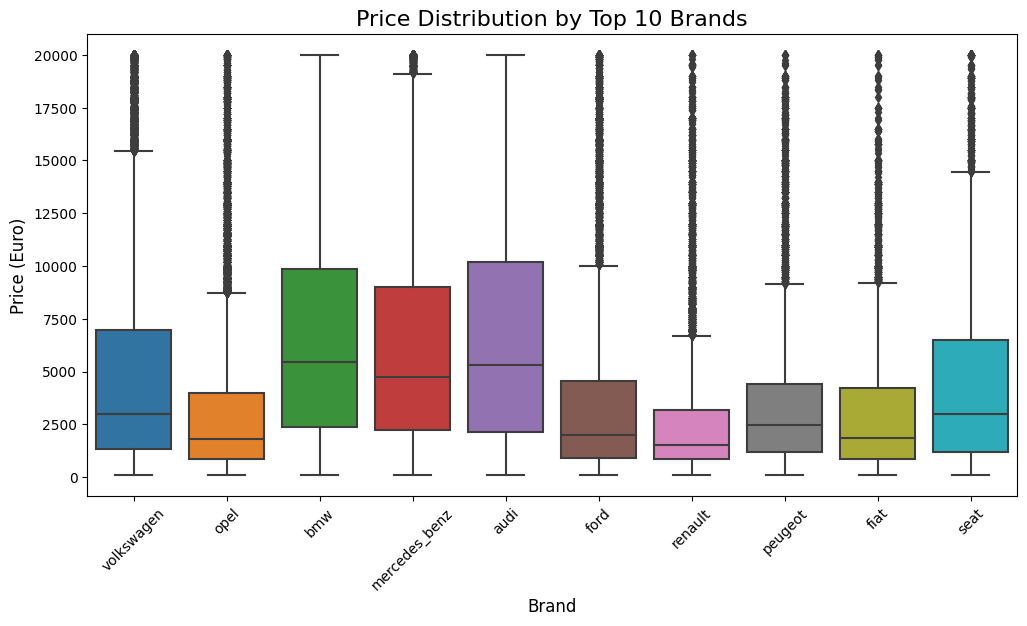

In [7]:
top_brands = car_data['Brand'].value_counts().head(10).index
brand_prices = car_data[car_data['Brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(data=brand_prices, x='Brand', y='Price', order=top_brands)
plt.title('Price Distribution by Top 10 Brands', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Price (Euro)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [8]:
# Separating features and target
X = car_data.drop(['Price'], axis=1)
y = car_data['Price']

# One-Hot Encoding categorical variables
categorical_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=12345)

# Scaling numerical features 
scaler = StandardScaler()
numerical_features = ['Power', 'Mileage', 'RegistrationYear', 'RegistrationMonth']
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

X_train.head(), y_train.head()


/tmp/ipykernel_344/2782115123.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
/opt/conda/envs/python3/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_344/2782115123.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

(               DateCrawled  RegistrationYear     Power   Mileage  \
 163394 2016-01-04 14:06:00          1.393473 -0.633942 -2.408475   
 262676 2016-03-18 18:25:00          0.240427  0.540917  0.588670   
 206988 2016-03-29 10:58:00          1.969996 -0.413656  0.588670   
 8118   2016-04-04 16:58:00         -0.624357 -0.560514  0.588670   
 189279 2016-03-27 17:50:00          0.096296  0.026916  0.588670   
 
         RegistrationMonth DateCreated            LastSeen  \
 163394          -1.383750  2016-01-04 2016-07-04 01:46:00   
 262676          -0.827318  2016-03-18 2016-03-18 22:42:00   
 206988          -0.827318  2016-03-29 2016-05-04 19:46:00   
 8118             0.841977  2016-04-04 2016-04-04 16:58:00   
 189279          -1.105534  2016-03-27 2016-06-04 15:15:00   
 
         VehicleType_convertible  VehicleType_coupe  VehicleType_other  ...  \
 163394                        0                  0                  0  ...   
 262676                        0                  0 

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good EDA and data preprocessing
</div>

## Model training

In [9]:
# Dropping datetime columns
datetime_columns = ['DateCrawled', 'DateCreated', 'LastSeen']
X_train = X_train.drop(columns=datetime_columns, errors='ignore')
X_test = X_test.drop(columns=datetime_columns, errors='ignore')

In [10]:
%%time

# Training Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_lr = lr_model.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
print(f"Linear Regression RMSE: {rmse_lr}")


Linear Regression RMSE: 2623.7230100564007
CPU times: user 8.33 s, sys: 1.32 s, total: 9.64 s
Wall time: 9.59 s


In [11]:
%%time

# Training Random Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=12345, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_rf = rf_model.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
print(f"Random Forest RMSE: {rmse_rf}")


Random Forest RMSE: 1910.5998003264626
CPU times: user 3min, sys: 168 ms, total: 3min
Wall time: 3min


In [12]:
%%time

# Training Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=10, random_state=12345)
dt_model.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_dt = dt_model.predict(X_test)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
print(f"Decision Tree RMSE: {rmse_dt}")


Decision Tree RMSE: 1990.732363250197
CPU times: user 2.84 s, sys: 100 ms, total: 2.94 s
Wall time: 2.95 s


In [13]:
%%time

# Training LightGBM
lgb_model = LGBMRegressor(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=12345)
lgb_model.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_lgb = lgb_model.predict(X_test)
rmse_lgb = mean_squared_error(y_test, y_pred_lgb, squared=False)
print(f"LightGBM RMSE: {rmse_lgb}")


LightGBM RMSE: 1657.3901406440423
CPU times: user 6.66 s, sys: 133 ms, total: 6.8 s
Wall time: 6.79 s


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done
</div>

## Model analysis

Linear Regression: Achieves an RMSE of 2623.7, serving as a simple baseline model. Its training time is fast at around 9.48 seconds, making it suitable for quick evaluations.

Decision Tree: Provides an RMSE of 1990.7, improving over Linear Regression with interpretable results. It trains efficiently at 3 seconds, but accuracy lags behind.

Random Forest: Delivers an RMSE of 1910.6, with strong predictions due to total averaging. However, its training time is significantly higher at approximately 3 minutes, reflecting its complexity.

LightGBM: Outperforms all models with an RMSE of 1657.4, combining high accuracy and efficiency. Its training time of 7 seconds makes it the best choice for balancing performance and speed.

## Conclusion

To develop an efficient and accurate car valuation model for Rusty Bargain's app, I evaluated multiple machine learning models based on prediction quality, training speed, and overall efficiency. Given the need for high prediction quality, efficient model training, and real-time valuation capabilities, LightGBM is the most suitable choice for integration into Rusty Bargain's app. It ensures precise car valuations while maintaining responsiveness and scalability for a seamless user experience.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent!
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells with the code have been arranged in order of execution
- [ ]  The data has been downloaded and prepared
- [ ]  The models have been trained
- [ ]  The analysis of speed and quality of the models has been performed